# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
CC_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
CC_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
CC_data.shape

(7043, 21)

In [4]:
CC_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking null value in datasets

In [6]:
CC_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null value in this data sets.

# Dataframe Description:
The dataset contains the data of the customer. On the basis of the data we have to dredict the total charges by the customer.

The dataset contains the data like'customerid','gender','SeniorCitizen','Partener','Dependents','tenure', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharge','TotalCharge'and'Churn'.

In the above dataset the target is to predict the "TotalCharges" paid by the customer.

Charn rate(sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the stedy-state level of customers a business will support. The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example in businesses with a subscriber-based service model such as mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks. Charn rate is an input into costomer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketion mix modeling.

# Checking datatypes of the columns

In [7]:
CC_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can observe that the "TotalCharges" has continuous data but it is an object type. Let us handle this column.

In [8]:
CC_data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
CC_data['TotalCharges'].nunique()

6531

In [10]:
CC_data.shape

(7043, 21)

In [11]:
CC_data.loc[CC_data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observations, we saw the some columns have space as the value.

In [12]:
CC_data["TotalCharges"]=CC_data["TotalCharges"].replace(" ",np.nan)

In [13]:
CC_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Converting the column type from object to float.

In [15]:
CC_data["TotalCharges"]=CC_data["TotalCharges"].astype(float)

Now we can see total charges column has some space values which is replaceed by nan values. Now we will handle the nan values.

Handling the nan values and replace it with the mean of the column. As the column is continuous in nature.

In [16]:
mean_total_charges = np.mean(CC_data["TotalCharges"])

In [17]:
CC_data["TotalCharges"]=CC_data["TotalCharges"].fillna(mean_total_charges)

In [18]:
CC_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
CC_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Making DataFrame For The Nominal Data

In [20]:
data_visualization_nominal=CC_data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']].copy()

In [21]:
data_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
len(CC_data.columns)

21

In [23]:
len(data_visualization_nominal.columns)

17

# Visualization of the Data

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

Male      3555
Female    3488
Name: gender, dtype: int64


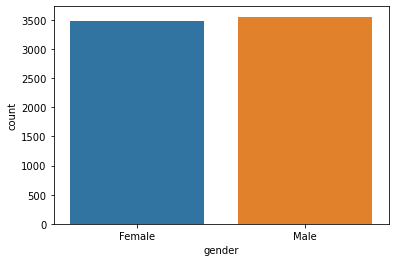

In [25]:
ax = sns.countplot(x="gender", data=data_visualization_nominal)
print(data_visualization_nominal["gender"].value_counts())

From the above observation total number of female 3488 and total number of male customer is 3555.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


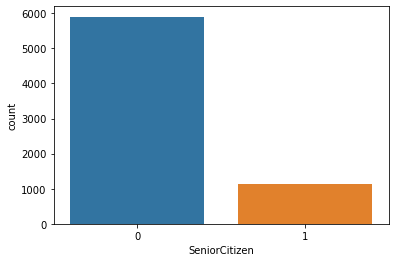

In [26]:
ax = sns.countplot(x="SeniorCitizen", data=data_visualization_nominal)
print(data_visualization_nominal["SeniorCitizen"].value_counts())

From the above observation non SeniorCitizen customer is 5901 and SeniorCitizen customer is 1142.

No     3641
Yes    3402
Name: Partner, dtype: int64


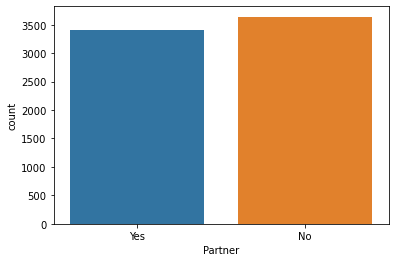

In [27]:
ax = sns.countplot(x="Partner", data=data_visualization_nominal)
print(data_visualization_nominal["Partner"].value_counts())

From the above observation total number of married customer is 3402 and total number of unmarried customer is 3641.

No     4933
Yes    2110
Name: Dependents, dtype: int64


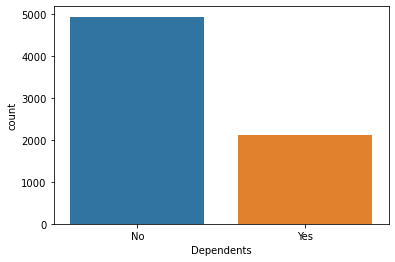

In [28]:
ax = sns.countplot(x="Dependents", data=data_visualization_nominal)
print(data_visualization_nominal["Dependents"].value_counts())

From the above observation total number of dependent customer is 2110 and total number of independent customer is 4933.

Yes    6361
No      682
Name: PhoneService, dtype: int64


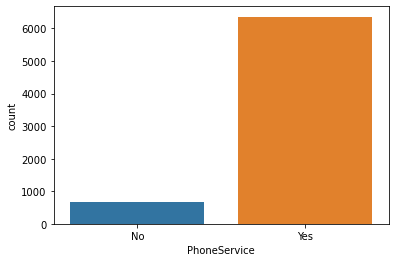

In [29]:
ax = sns.countplot(x="PhoneService", data=data_visualization_nominal)
print(data_visualization_nominal["PhoneService"].value_counts())

From the above observation total number of customer using phone service is 6361 and total number of customer not using phone service is 682.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


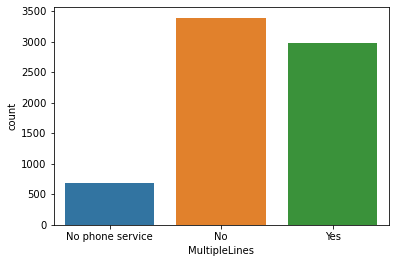

In [30]:
ax = sns.countplot(x="MultipleLines", data=data_visualization_nominal)
print(data_visualization_nominal["MultipleLines"].value_counts())

From the above observation total number of customer not using any phone services is 682, using no multipl services is 3390 and total number of customer using multiple services is 2971.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


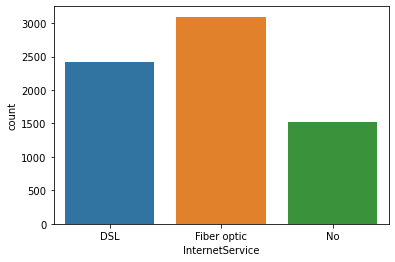

In [31]:
ax = sns.countplot(x="InternetService", data=data_visualization_nominal)
print(data_visualization_nominal["InternetService"].value_counts())

From the above observation total number of customer not using internet services is 1526, using fiber optic internet services is 3096 and using DSL services id 2421.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


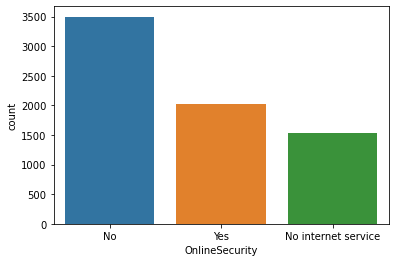

In [33]:
ax = sns.countplot(x="OnlineSecurity", data=data_visualization_nominal)
print(data_visualization_nominal["OnlineSecurity"].value_counts())

From the above observation total number of customer not using internet service is 1526, Not usting online security is 3498 and using online security is 2019.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


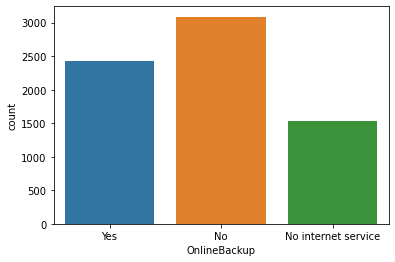

In [35]:
ax = sns.countplot(x="OnlineBackup", data=data_visualization_nominal)
print(data_visualization_nominal["OnlineBackup"].value_counts())

From the above observation total number of customer not using internet services is 1526, Not using online backup services is 3088 and using online backup is 2429.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


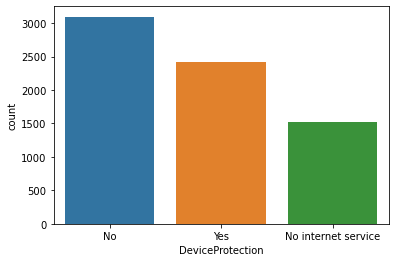

In [37]:
ax = sns.countplot(x="DeviceProtection", data=data_visualization_nominal)
print(data_visualization_nominal["DeviceProtection"].value_counts())

From the above observation total number of customer not using internet services is 1526, Not using device protection services is 3095 and using device protection services is 2422.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


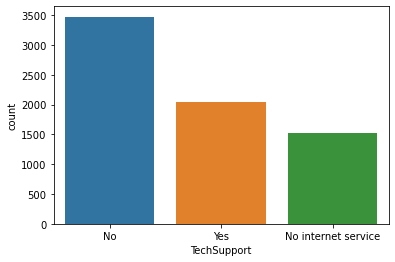

In [38]:
ax = sns.countplot(x="TechSupport", data=data_visualization_nominal)
print(data_visualization_nominal["TechSupport"].value_counts())

From the above observation total number of customer not using internet services is 1526, Not using techsupport services is 3473 and using techsupport services is 2044.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


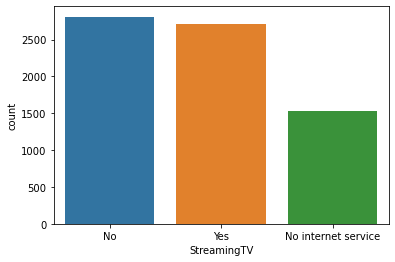

In [39]:
ax = sns.countplot(x="StreamingTV", data=data_visualization_nominal)
print(data_visualization_nominal["StreamingTV"].value_counts())

From the above observation total number of customer not using internet services is 1526, Not using streamingTV services is 2810 and using streamingTV services is 2707.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


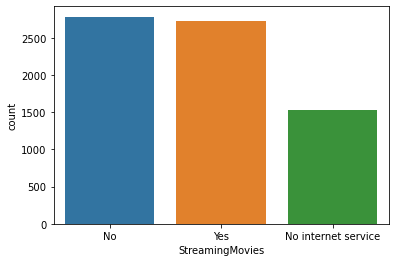

In [40]:
ax = sns.countplot(x="StreamingMovies", data=data_visualization_nominal)
print(data_visualization_nominal["StreamingMovies"].value_counts())

From the above observation total number of customer not using internet services is 1526, Not using StreamingMovies services is 2785 and using StreamingMovies services is 2732.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


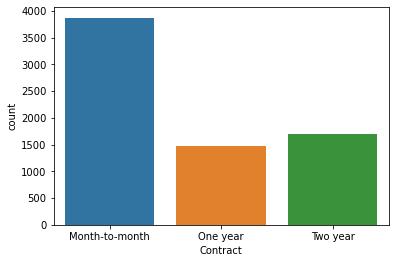

In [41]:
ax = sns.countplot(x="Contract", data=data_visualization_nominal)
print(data_visualization_nominal["Contract"].value_counts())

From the above observation total number of customer Month-to-Month is 3875, One year contract is 1473 and Two year contract is 1695.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


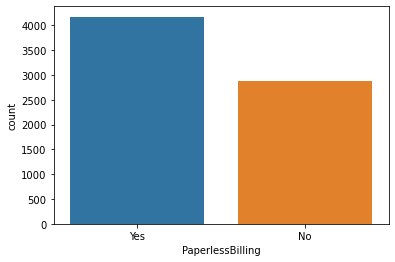

In [42]:
ax = sns.countplot(x="PaperlessBilling", data=data_visualization_nominal)
print(data_visualization_nominal["PaperlessBilling"].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


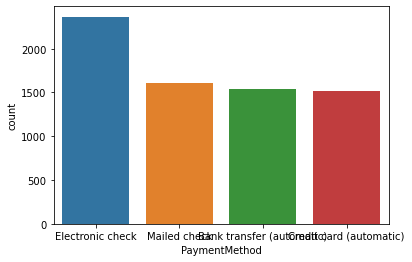

In [43]:
ax = sns.countplot(x="PaymentMethod", data=data_visualization_nominal)
print(data_visualization_nominal["PaymentMethod"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


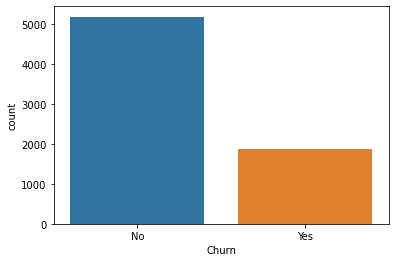

In [44]:
ax = sns.countplot(x="Churn", data=data_visualization_nominal)
print(data_visualization_nominal["Churn"].value_counts())

For the ordinal categorical data we will use line plot as it will give the flow of the line of the classes of the columns:

# Making dataframe of the ordianl data.

In [46]:
data_visulization_ordinal=CC_data[["customerID","tenure"]].copy()

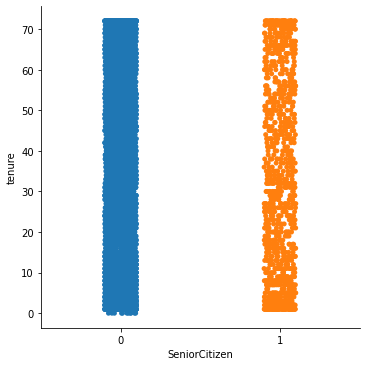

In [47]:
sns.catplot(x="SeniorCitizen", y="tenure", data=CC_data)

# Checking the distribution of the continuous value of the float type columns.

In [49]:
data_visualization_continuous=CC_data[["MonthlyCharges","TotalCharges"]].copy()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

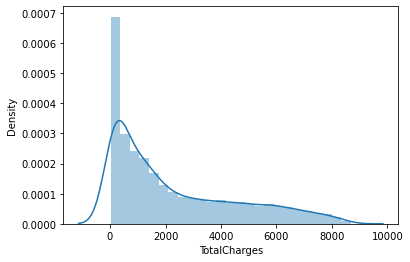

In [50]:
sns.distplot(data_visualization_continuous['TotalCharges'], kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

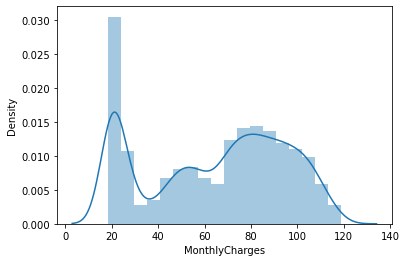

In [51]:
sns.distplot(data_visualization_continuous['MonthlyCharges'], kde=True)

In [52]:
CC_data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [53]:
CC_data['TotalCharges'].value_counts()

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [54]:
CC_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


All the columns are not present as they are of object type. Count of each column is 7043 showing there are no null values.

In [55]:
#describe function for non numeric variables.
q=CC_data[['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]
q.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


# Feature Engineering
### Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
l=LabelEncoder()
o=OrdinalEncoder()

In [57]:
#We use ordinal encoder to Encode Independent features
for i in CC_data.columns:
    if CC_data[i].dtypes=='object' and i!='TotalCharges':
        CC_data[i]=o.fit_transform(CC_data[i].values.reshape(-1,1))

In [58]:
#We use label encoder to encode label 
CC_data['TotalCharges']=l.fit_transform(CC_data['TotalCharges'])

# Removing Outliers

In [59]:
from scipy.stats import zscore

In [60]:
#Method to find optimum threshold
def threshold():
    for i in np.arange(3,5,0.2):
        data=CC_data.copy()
        data=data[(z<i).all(axis=1)]
        loss=(CC_data.shape[0]-data.shape[0])/CC_data.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [61]:
z=np.abs(zscore(CC_data))
threshold()

With threshold 3.0 data loss is 9.68%
With threshold 3.2 data loss is 0.0%
With threshold 3.4 data loss is 0.0%
With threshold 3.6 data loss is 0.0%
With threshold 3.8 data loss is 0.0%
With threshold 4.0 data loss is 0.0%
With threshold 4.2 data loss is 0.0%
With threshold 4.4 data loss is 0.0%
With threshold 4.6 data loss is 0.0%
With threshold 4.8 data loss is 0.0%


In [62]:
CC_data=CC_data[(z<3.0).all(axis=1)]

In [63]:
#Separating dependent and independent features.
x=CC_data.copy()
x.drop('TotalCharges',axis=1,inplace=True)
y=CC_data['TotalCharges']

In [64]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [65]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [66]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [67]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [68]:
#To evakuate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [69]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [70]:
#Creates and trains model from the models list
def createmodel(x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    for i in models:
        model=i
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,ytest,model,xtest,score) 

In [ ]:
createmodel(x,y)